<a href='https://colab.research.google.com/github/ishaqmarashy/red-light-traffic-violation-classification/blob/main/decision%20tree%20classifier.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

## Preprocess Data

In [34]:
import pandas as pd
import os
import numpy as np

csv_filename1 = "data/tv_asos.csv"
df = pd.read_csv(csv_filename1)

In [35]:
df.drop(columns=['Accident','Violation Type','Charge','Article','Contributed To Accident','Article','HAZMAT','Personal Injury','Fatal'],inplace=True)

In [36]:
df

,Latitude,Longitude,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,...,DV,DATE,tmpf,dwpf,sknt,relh,alti,vsby,feel,skyc1
0,38.997645,-77.027105,No,No,No,No,No,No,MD,02 - Automobile,...,0,2023-04-30 03:00:00,57.919565,55.435556,3.970000,91.751778,29.741089,9.480000,57.897778,CLR
1,38.997566,-77.109724,No,No,No,No,No,No,MD,02 - Automobile,...,1,2023-05-02 12:00:00,46.962791,38.032558,7.695238,72.453721,29.453962,9.416667,44.610233,BKN
2,39.223205,-77.260313,No,Yes,No,No,No,No,MD,02 - Automobile,...,0,2023-05-16 10:00:00,55.866667,52.961905,3.707547,90.415238,29.960654,9.923077,55.869048,CLR
3,39.057987,-76.968677,No,No,No,No,No,No,MD,02 - Automobile,...,1,2023-05-17 14:00:00,64.221951,49.446341,8.872549,59.397317,29.769541,10.000000,64.229268,CLR
4,38.999282,-77.026098,No,Yes,No,No,No,No,MD,02 - Automobile,...,0,2023-05-20 10:00:00,57.889474,56.616667,2.958678,95.791481,30.064426,4.885798,57.838889,OVC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,0,2013-09-17 02:00:00,58.643810,53.248095,1.634146,83.465952,30.222143,9.575000,58.635714,SCT
1782,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,0,2013-09-25 02:00:00,53.233333,49.070000,0.512195,86.456190,29.981429,9.926829,53.203571,CLR
1783,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,0,2013-09-19 02:00:00,55.603182,49.180455,1.697674,79.646364,30.228409,10.000000,55.557955,CLR
1784,39.144320,-77.067415,No,No,No,No,No,No,MD,02 - Automobile,...,0,2014-12-17 23:00:00,41.876923,28.556757,7.972973,57.388378,30.011538,9.921053,38.103714,CLR


https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html

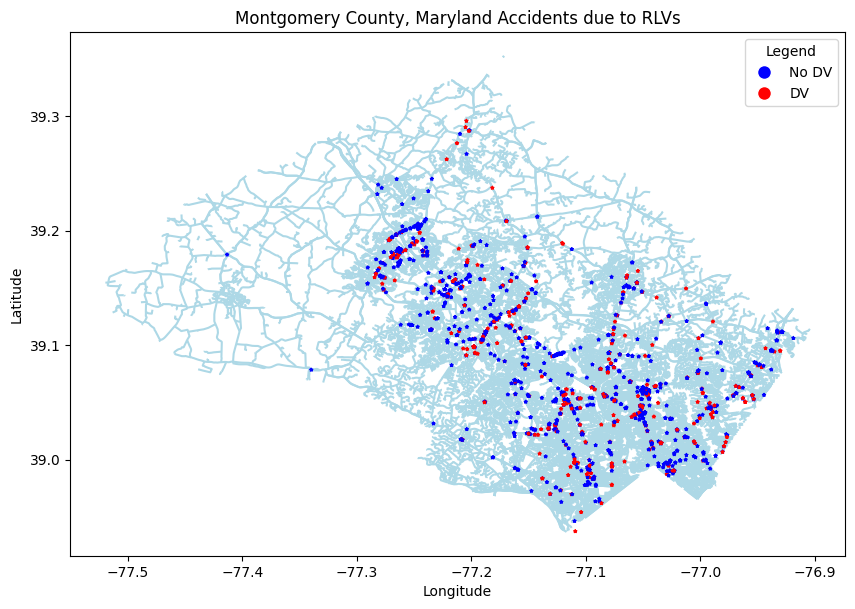

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

filtered_df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0) & (df['Longitude'] <= -76.9)& (df['Latitude'] >=38.93)]
montgomery_shapefile_path = './data/roads/tl_2019_24031_roads.shp'
montgomery_gdf = gpd.read_file(montgomery_shapefile_path)

geometry = [Point(xy) for xy in zip(filtered_df['Longitude'], filtered_df['Latitude'])]
geo_points = gpd.GeoDataFrame(filtered_df, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 10))

montgomery_gdf.plot(ax=ax, color='lightblue', edgecolor='black', zorder=1)
geo_points.plot(ax=ax, marker='*', color=filtered_df['DV'].map({0: 'blue', 1: 'red'}), markersize=5, zorder=2)

legend_labels = {0: 'No DV', 1: 'DV'}
ax.legend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
          [legend_labels[0], legend_labels[1]], title='Legend', loc='upper right')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Montgomery County, Maryland Accidents due to RLVs')
plt.show()


In [38]:
df.drop(columns=['Latitude', 'Longitude'],inplace=True)

In [39]:
df.isna().sum()

Belts                 0
Property Damage       0
Commercial License    0
Commercial Vehicle    0
Alcohol               0
Work Zone             0
State                 0
VehicleType           0
Year                  1
Make                  0
Model                 0
Color                 5
Race                  0
Gender                0
Driver City           0
Driver State          0
DL State              1
DV                    0
DATE                  0
tmpf                  0
dwpf                  0
sknt                  0
relh                  0
alti                  0
vsby                  0
feel                  0
skyc1                 0
dtype: int64

In [40]:
import pandas as pd
from sklearn.impute import SimpleImputer


data_for_imputation = df.copy()

categorical_imputer = SimpleImputer(strategy='most_frequent')

imputed_values = categorical_imputer.fit_transform(data_for_imputation)

imputed_df = pd.DataFrame(imputed_values,columns=df.columns)

df= imputed_df

df


,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,...,DV,DATE,tmpf,dwpf,sknt,relh,alti,vsby,feel,skyc1
0,No,No,No,No,No,No,MD,02 - Automobile,2020.0,LINC,...,0,2023-04-30 03:00:00,57.919565,55.435556,3.97,91.751778,29.741089,9.48,57.897778,CLR
1,No,No,No,No,No,No,MD,02 - Automobile,2023.0,MAZDA,...,1,2023-05-02 12:00:00,46.962791,38.032558,7.695238,72.453721,29.453962,9.416667,44.610233,BKN
2,No,Yes,No,No,No,No,MD,02 - Automobile,2023.0,VOLK,...,0,2023-05-16 10:00:00,55.866667,52.961905,3.707547,90.415238,29.960654,9.923077,55.869048,CLR
3,No,No,No,No,No,No,MD,02 - Automobile,2012.0,HONDA,...,1,2023-05-17 14:00:00,64.221951,49.446341,8.872549,59.397317,29.769541,10.0,64.229268,CLR
4,No,Yes,No,No,No,No,MD,02 - Automobile,2018.0,HOND,...,0,2023-05-20 10:00:00,57.889474,56.616667,2.958678,95.791481,30.064426,4.885798,57.838889,OVC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,0,2013-09-17 02:00:00,58.64381,53.248095,1.634146,83.465952,30.222143,9.575,58.635714,SCT
1782,No,No,No,No,No,No,MD,02 - Automobile,1997.0,MITS,...,0,2013-09-25 02:00:00,53.233333,49.07,0.512195,86.45619,29.981429,9.926829,53.203571,CLR
1783,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,0,2013-09-19 02:00:00,55.603182,49.180455,1.697674,79.646364,30.228409,10.0,55.557955,CLR
1784,No,No,No,No,No,No,MD,02 - Automobile,1996.0,ISUZU,...,0,2014-12-17 23:00:00,41.876923,28.556757,7.972973,57.388378,30.011538,9.921053,38.103714,CLR


In [41]:
df['VehicleType'].value_counts()

VehicleType
02 - Automobile              1580
05 - Light Duty Truck          90
28 - Other                     40
03 - Station Wagon             31
01 - Motorcycle                18
06 - Heavy Duty Truck          15
10 - Transit Bus                6
07 - Truck/Road Tractor         3
08 - Recreational Vehicle       1
20 - Commercial Rig             1
29 - Unknown                    1
Name: count, dtype: int64

In [42]:
def classify_vehicle(vehicle_type):
    if any(category in vehicle_type for category in ['01 - Motorcycle']):
        return 'Light'
    elif any(category in vehicle_type for category in ['28 - Other','29 - Unknown', '03 - Station Wagon', '02 - Automobile']):
        return 'Medium'
    elif any(category in vehicle_type for category in ['05 - Light Duty Truck', '07 - Truck/Road Tractor', '08 - Recreational Vehicle',]):
        return 'Heavy'
    else:
        return 'Very Heavy'
    
df['VehicleType'] = df['VehicleType'].apply(classify_vehicle)

In [43]:
df['Year']=df['Year'].astype(int)
df['Vehicle'] = df[[ 'Year', 'Make', 'Model']].astype(str).apply(lambda x: ', '.join(x), axis=1)
df.drop(columns=['Year', 'Make', 'Model'],inplace=True)

In [44]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['Weekend'] = df['DATE'].dt.dayofweek.apply(lambda x: 1 if x in [5, 6] else 0)
df['Time'] = df['DATE'].dt.time
df['DATE'] = df['DATE'].dt.date

In [45]:
def sine_of_time(time):
    return np.sin(2 * np.pi * (time.hour * 3600 + time.minute * 60 + time.second) / (24 * 3600))

df['SinOfTime'] = df['Time'].apply(sine_of_time)

In [46]:
def categorize_time(time):
    if 5 < time.hour <= 9:
        return 'am-peak'
    elif 12 < time.hour <= 14:
        return 'mid-peak'
    elif 16 < time.hour <= 20:
        return 'pm-peak'
    else:
        return 'non-peak'
    
df['TimeCategory'] = df['Time'].apply(categorize_time)

In [47]:
df=df[['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone',  'VehicleType', 'Race','SinOfTime','Weekend',
       'Gender', 'DV','tmpf', 'dwpf', 'sknt', 'relh', 'alti', 'vsby', 'feel','TimeCategory']]


In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

columns_to_label_encode = ['Belts', 'Property Damage', 'Commercial License', 
                           'Commercial Vehicle', 'Alcohol', 'Gender', 'Work Zone']

columns_to_onehot_encode = ['VehicleType','Race',  'TimeCategory']

for column in columns_to_label_encode:
    df[column] = label_encoder.fit_transform(df[column])

onehot_encoded = onehot_encoder.fit_transform(df[columns_to_onehot_encode]).toarray()
onehot_columns = onehot_encoder.get_feature_names_out(columns_to_onehot_encode)
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_columns)

df = pd.concat([df, df_onehot], axis=1)

df = df.drop(columns=columns_to_onehot_encode)
df

C:\Users\ishaq\AppData\Local\Temp\ipykernel_18496\210833712.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\ishaq\AppData\Local\Temp\ipykernel_18496\210833712.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\ishaq\AppData\Local\Temp\ipykernel_18496\210833712.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,SinOfTime,Weekend,Gender,DV,...,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_NATIVE AMERICAN,Race_OTHER,Race_WHITE,TimeCategory_am-peak,TimeCategory_mid-peak,TimeCategory_non-peak,TimeCategory_pm-peak
0,0,0,0,0,0,0,7.071068e-01,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,-3.216245e-16,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1,0,0,0,0,5.000000e-01,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,0,0,-5.000000e-01,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,1,0,0,0,0,5.000000e-01,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0,0,0,0,0,0,5.000000e-01,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1782,0,0,0,0,0,0,5.000000e-01,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1783,0,0,0,0,0,0,5.000000e-01,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1784,0,0,0,0,0,0,-2.588190e-01,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
df.columns

Index(['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'SinOfTime', 'Weekend', 'Gender', 'DV', 'tmpf',
       'dwpf', 'sknt', 'relh', 'alti', 'vsby', 'feel', 'VehicleType_Heavy',
       'VehicleType_Light', 'VehicleType_Medium', 'VehicleType_Very Heavy',
       'Race_ASIAN', 'Race_BLACK', 'Race_HISPANIC', 'Race_NATIVE AMERICAN',
       'Race_OTHER', 'Race_WHITE', 'TimeCategory_am-peak',
       'TimeCategory_mid-peak', 'TimeCategory_non-peak',
       'TimeCategory_pm-peak'],
      dtype='object')

In [50]:
x=df.drop(columns=['DV'])
y=df['DV']
x['tmpf'] = pd.to_numeric(x['tmpf'], errors='coerce')
x['dwpf'] = pd.to_numeric(x['dwpf'], errors='coerce')
x['sknt'] = pd.to_numeric(x['sknt'], errors='coerce')
x['relh'] = pd.to_numeric(x['relh'], errors='coerce')
x['alti'] = pd.to_numeric(x['alti'], errors='coerce')
x['vsby'] = pd.to_numeric(x['vsby'], errors='coerce')
x['feel'] = pd.to_numeric(x['feel'], errors='coerce')

y = pd.to_numeric(y, errors='coerce')

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,
                                                    random_state=42, stratify=y)

## SMOTE

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [52]:
y.value_counts()

DV
0    1227
1     559
Name: count, dtype: int64

In [53]:
print(x.dtypes) 
print(y.dtypes)  

Belts                       int32
Property Damage             int32
Commercial License          int32
Commercial Vehicle          int32
Alcohol                     int32
Work Zone                   int32
SinOfTime                 float64
Weekend                     int64
Gender                      int32
tmpf                      float64
dwpf                      float64
sknt                      float64
relh                      float64
alti                      float64
vsby                      float64
feel                      float64
VehicleType_Heavy         float64
VehicleType_Light         float64
VehicleType_Medium        float64
VehicleType_Very Heavy    float64
Race_ASIAN                float64
Race_BLACK                float64
Race_HISPANIC             float64
Race_NATIVE AMERICAN      float64
Race_OTHER                float64
Race_WHITE                float64
TimeCategory_am-peak      float64
TimeCategory_mid-peak     float64
TimeCategory_non-peak     float64
TimeCategory_p

In [54]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_OS, y_OS = oversample.fit_resample(X_train, y_train)

In [55]:
y_OS.value_counts()

DV
0    859
1    859
Name: count, dtype: int64

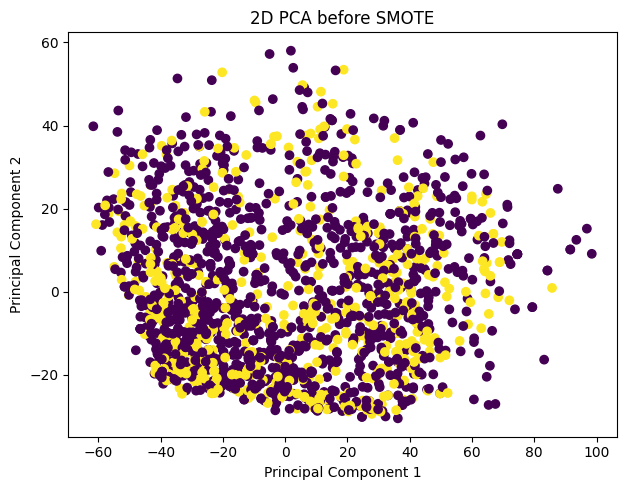

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Label'] = y

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('2D PCA before SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


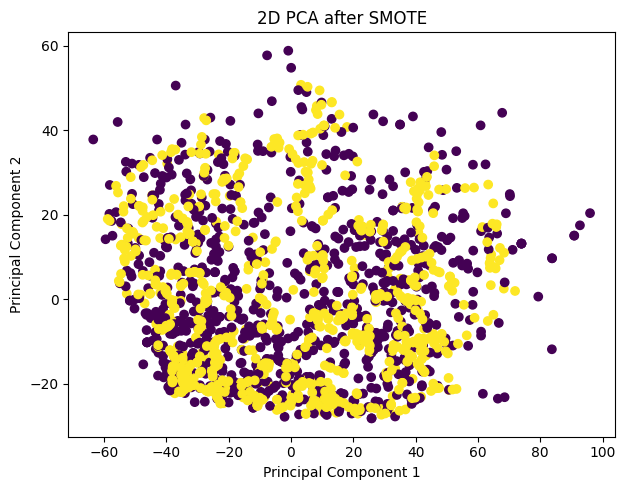

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_OS)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Label'] = y_OS

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_OS, cmap='viridis')
plt.title('2D PCA after SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchbnn as bnn
import matplotlib.pyplot as plt

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)


In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_OS.values)
X_test_normalized = scaler.transform(X_test.values)


os_x_train_tensor = torch.FloatTensor(X_train_normalized)
os_y_train_tensor = torch.FloatTensor(y_OS.values)

X_train_normalized = scaler.transform(X_train.values)

x_train_tensor = torch.FloatTensor(X_train_normalized)
y_train_tensor = torch.FloatTensor(y_train.values)
x_test_tensor = torch.FloatTensor(X_test_normalized)
y_test_tensor = torch.FloatTensor(y_test.values)

In [60]:
len(os_x_train_tensor)

1718

In [61]:
len(x_train_tensor)

1250

## Ensamble


In [62]:
import pandas as pd

corr_matrix = pd.concat([x,y],axis=1).corr()

target_corr = corr_matrix['DV']

sorted_corr = target_corr.abs().sort_values(ascending=False)

top_features = sorted_corr.index[1:] 

top_corr_values = target_corr[top_features]

result_df = pd.DataFrame({'Feature': top_features, 'Correlation': top_corr_values})
print(result_df)

                                       Feature  Correlation
Property Damage                Property Damage    -0.371355
Belts                                    Belts     0.157717
TimeCategory_non-peak    TimeCategory_non-peak    -0.085160
TimeCategory_am-peak      TimeCategory_am-peak     0.075678
Commercial License          Commercial License     0.057843
VehicleType_Medium          VehicleType_Medium    -0.055274
relh                                      relh     0.048071
VehicleType_Heavy            VehicleType_Heavy     0.046390
Gender                                  Gender    -0.039646
Race_HISPANIC                    Race_HISPANIC    -0.038434
tmpf                                      tmpf    -0.035803
vsby                                      vsby    -0.035443
feel                                      feel    -0.032126
TimeCategory_mid-peak    TimeCategory_mid-peak     0.032074
VehicleType_Very Heavy  VehicleType_Very Heavy     0.023144
Alcohol                                A

### Random Forest and Decision Trees

In [63]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np

search_space = {
    'criterion': Categorical(['gini', 'entropy', 'log_loss']),
    'max_depth': Integer(1, 100),
    'min_child_weight': Integer(1, 10),
    'subsample': Real(0.01, 1.0, 'uniform'),
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),
    'gamma': Real(0.1, 10, 'uniform'),
    'learning_rate': Real(0.1, 1.0, 'uniform')
}

def bayesian_optimization_xgboost(x_train, y_train, x_test, y_test, search_space, n_calls=10):
    clf = XGBClassifier(
        objective='binary:logistic',
        n_estimators=200,
        eval_metric='logloss',
        random_state=42
    )

    opt = BayesSearchCV(
        clf,
        search_space,
        n_iter=n_calls,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        random_state=42
    )

    opt.fit(x_train, y_train)

    print('Best Accuracy: {:.3f}'.format(1.0 - opt.best_score_))
    print('Best Parameters:', opt.best_params_)
    
    test_predicted = opt.predict(x_test)
    test_accuracy = accuracy_score(test_predicted, y_test)

    print('Accuracy on Test Set: {:.3f}'.format(test_accuracy))

    return opt

result = bayesian_optimization_xgboost(X_train, y_train, X_test, y_test, search_space, n_calls=100)


Best Accuracy: 0.253
Best Parameters: OrderedDict([('colsample_bytree', 0.25938781177951487), ('criterion', 'entropy'), ('gamma', 8.071638985703816), ('learning_rate', 0.3412423096603826), ('max_depth', 100), ('min_child_weight', 1), ('subsample', 0.5210263385522719)])
Accuracy on Test Set: 0.718


c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [16:04:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


In [64]:
result.best_params_

OrderedDict([('colsample_bytree', 0.25938781177951487),
             ('criterion', 'entropy'),
             ('gamma', 8.071638985703816),
             ('learning_rate', 0.3412423096603826),
             ('max_depth', 100),
             ('min_child_weight', 1),
             ('subsample', 0.5210263385522719)])

In [65]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = XGBClassifier(
    n_estimators=200,
    random_state=42,**result.best_params_
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.7182835820895522

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82       368
           1       0.67      0.20      0.30       168

    accuracy                           0.72       536
   macro avg       0.70      0.58      0.56       536
weighted avg       0.71      0.72      0.66       536



c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [16:04:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


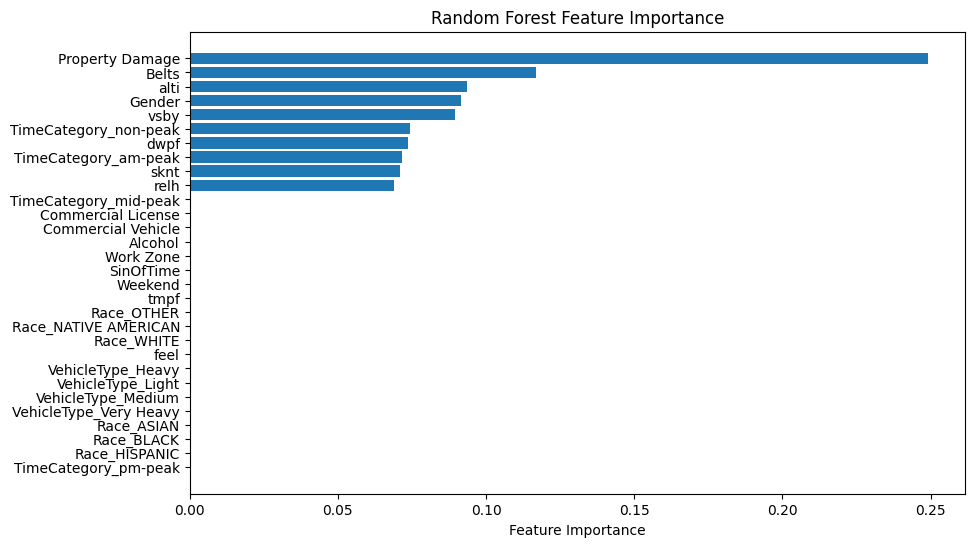

In [66]:
import matplotlib.pyplot as plt

feature_importances = clf.feature_importances_
feature_names = x.columns 

sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [67]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, classification_report


clf = XGBClassifier(
    n_estimators=200,
    random_state=42,**result.best_params_
)

sfs = SequentialFeatureSelector(clf, n_features_to_select=30, direction='backward')
sfs.fit(X_train, y_train)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

selected_features = X_train.columns[sfs.get_support()]
X_train_selected = sfs.transform(X_train)
X_val_selected = sfs.transform(X_test)

clf.fit(X_train_selected, y_train)

y_val_pred = clf.predict(X_val_selected)
classification_rep = classification_report(y_test, y_val_pred)

print("Selected Features:", selected_features)
print("Validation Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [16:04:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [16:04:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [16:04:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn

Selected Features: Index(['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'SinOfTime', 'dwpf', 'alti',
       'TimeCategory_non-peak'],
      dtype='object')
Validation Accuracy: 0.7182835820895522

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.98      0.83       368
           1       0.78      0.19      0.31       168

    accuracy                           0.73       536
   macro avg       0.75      0.58      0.57       536
weighted avg       0.74      0.73      0.67       536



In [68]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [69]:
result= bayesian_optimization_xgboost(X_train_selected, y_train, X_test_selected, y_test, search_space, n_calls=30)

Best Accuracy: 0.255
Best Parameters: OrderedDict([('colsample_bytree', 0.4160029192647807), ('criterion', 'gini'), ('gamma', 9.335393188593555), ('learning_rate', 0.3842196341383438), ('max_depth', 67), ('min_child_weight', 5), ('subsample', 0.35742202155015257)])
Accuracy on Test Set: 0.724


c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [16:05:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


In [70]:
from sklearn.metrics import classification_report, accuracy_score

clf = XGBClassifier(
    n_estimators=200,
    random_state=42,**result.best_params_
)
clf.fit(X_train_selected, y_train)

y_pred = clf.predict(X_test_selected)

classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.72      0.99      0.83       368
           1       0.83      0.15      0.25       168

    accuracy                           0.72       536
   macro avg       0.78      0.57      0.54       536
weighted avg       0.75      0.72      0.65       536



c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [16:05:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


-----------------------